In [1]:
from sklearn.datasets import load_boston
data  = load_boston()
X, y = data['data'], data['target']

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1/(1+np.exp(-x))

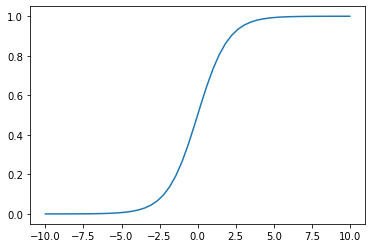

In [4]:
sub_x = np.linspace(-10,10)
plt.plot(sub_x, sigmoid(sub_x))

In [9]:
import random
def random_linear(x):
    k, b = random.random(),random.random()
    return k*x+b

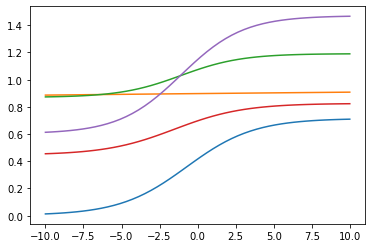

In [13]:
for _ in range(5):
    i = np.random.choice(len(sub_x))
    plt.plot(sub_x,random_linear(sigmoid(random_linear(sub_x))))

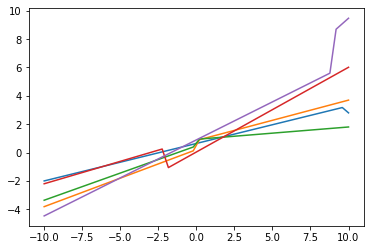

In [21]:
for _ in range(5):
    i = np.random.choice(len(sub_x))
    output1 = np.concatenate((random_linear(sub_x[:i]),random_linear(sub_x[i:])))
    i2 = random.choice(range(len(output1)))
    output2 = np.concatenate((sigmoid(output1[:i2]),sigmoid(output1[i2:])))
    plt.plot(sub_x, output1)

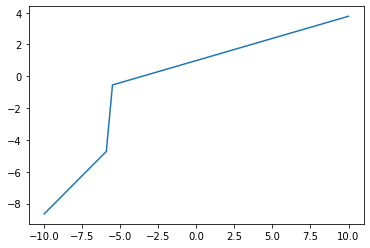

In [32]:
from matplotlib.animation import FuncAnimation

def draw(index):
    i = np.random.choice(len(sub_x))
    output1 = np.concatenate((random_linear(sub_x[:i]),random_linear(sub_x[i:])))
    i2 = random.choice(range(len(output1)))
    output2 = np.concatenate((sigmoid(output1[:i2]),sigmoid(output1[i2:])))
    fig.clear()
    plt.plot(sub_x, output1)
    
fig = plt.gcf()
FuncAnimation(fig,draw, interval=300)

# 为什么要有激活函数
- 为了能让函数拟合非线性关系

In [58]:
compute_graph = {
    'k1':['L1'],
    'b1':['L1'],
    'x':['L1'],
    'L1':['sigmoid'],
    'k2':['L2'],
    'b2':['L2'],
    'sigmoid':['L2'],
    'L2':['Loss'],
    'y':['Loss']
}

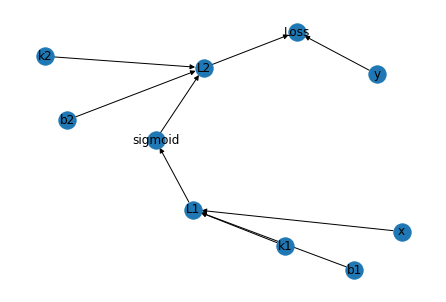

In [59]:
%matplotlib inline
import networkx as nx
nx.draw(nx.DiGraph(compute_graph), with_labels=True)

In [60]:
def get_output(graph, node):
    outputs = []
    for n, links in graph.items():
        if node==n: outputs+=links
    return outputs

get_output(compute_graph,'k1')

['L1']

In [61]:
computing_order = []

target = 'k1'
out = get_output(compute_graph, target)[0]
computing_order.append(target)

while out:
    computing_order.append(out)
    out = get_output(compute_graph, out)
    if out: out = out[0]

In [62]:
computing_order

['k1', 'L1', 'sigmoid', 'L2', 'Loss']

$$\partial$$

In [65]:
order = []

for index,n in enumerate(computing_order[:-1]):
    order.append((computing_order[index+1],n))

In [67]:
'*'.join(['∂{}/∂{}'.format(a,b) for a,b in order[::-1]])

'∂Loss/∂L2*∂L2/∂sigmoid*∂sigmoid/∂L1*∂L1/∂k1'

In [68]:
def get_patamter_order(p):
    computing_order = []

    target = p
    out = get_output(compute_graph, target)[0]
    computing_order.append(target)

    while out:
        computing_order.append(out)
        out = get_output(compute_graph, out)
        if out: out = out[0]
    
    order = []

    for index,n in enumerate(computing_order[:-1]):
        order.append((computing_order[index+1],n))
        
    return '*'.join(['∂{}/∂{}'.format(a,b) for a,b in order[::-1]])

In [69]:
get_patamter_order('k1')

'∂Loss/∂L2*∂L2/∂sigmoid*∂sigmoid/∂L1*∂L1/∂k1'